# Linear regression IV

## With multiple variables (Multivariate linear regression)

This one is more powerfull that works with multiple features (variables). Previously we mapped <code>**between a dependent variable(y) and one or more independent variables(x)**</code>

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# just for the nicer style

plt.style.use('seaborn-whitegrid')
from pandas import Series, DataFrame
from sklearn.datasets import load_boston

data_set = load_boston()
boston_df = DataFrame(data_set.data)
boston_df.columns = data_set.feature_names
boston_df['Kaina tūks. $'] = data_set.target
sample = boston_df[["RM", "Kaina tūks. $"]]
sample.head()

,RM,Kaina tūks. $
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


So we used a single feature x<code>**(RM)**</code> to predict y<code>**(the price).**</code> 
And this was our hypothesis:

$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

But if we had more than one features. Like property age, tax and crime rate and etc. 

In [6]:
sample = boston_df
sample.head()
#print(data_set.DESCR)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Kaina tūks. $
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


This gives a lot more information to predict price. For all of these features(variables) we will use notation of <code>**x1, x2, x3, etc**</code>. For target(output variable) we will continue to use <code>**y**</code>. 

<code>**Notation**</code>:
 * <code>**n**</code> = number of features;
 * <code>**m**</code> = number of training samples;
 * <code>**x(i)**</code> = input variables <code>**(features)**</code> of i'th training example;
 * <code>**x(i)(j)**</code> = value of feature j in i'th training example.
 
Lets say x(2) is going to be a vector of features for our second training example :

\begin{equation*}x^{2} = 
\begin{bmatrix}
0.02731 \\
0.0  \\
7.07 \\
0.0  \\ 
0.0  \\
0.469\\
...
\end{bmatrix}
\in \mathbb{R^{n}}
\end{equation*}

So plainly superscipt is just an <code>**index into the training sample**</code>. And the subscirpt is the reference to training sample feature.

$$ x^{(2)}_3$$

## Practice exercise
In our training set above what is:

$$ x^{(4)}_6$$

Now that we have multiple features to deal with. What would our form of hypothesis shoud bel like ?
Previously with a single <code>**x**</code> feature it was :
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Now it's going to be this:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

Some arbitrary example would look like:

$$h_{\theta}(x) = 80 + 2.2x_{1} + 0.05x_{2} + 3x_{2} + 2.2x_{3} - 5.05x_{4}$$

<code>**Recap**</code> hypothesis is trying to predict the output value <code>**y**</code>with given input values <code>**x**</code>.

Lets simply this equation:
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$

For convenience of notation, define a <code>**zero'th feature that always take a value of 1.**</code>
$$ x^{(i)}_0 = 1$$

Now our feature <code>**vector 𝑥⃗**</code>  becomes n+1 dimensional vector that is zero indexed.

\begin{equation*}
x = 
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

And our parameters can be a vector:
\begin{equation*}
\theta = 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\ 
...   \\
\theta_{n} \\
\end{bmatrix}
\in
\mathbb{R^{n+1}}
\end{equation*}

So our hypothesis can we rewriten as:
$$h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n} = \vec{\theta^\top} \vec{x}$$

\begin{equation*}
\begin{bmatrix}
\theta_{0} \theta_{1} \theta_{2}  ... \theta_{n}
\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
x_{2} \\ 
...   \\
x_{n} \\
\end{bmatrix}
= \theta^\top \ x
\end{equation*}

Its just an convienent way to write hypothesis as just the inner product between our parameter theta vector and our feature vector x and little notation allows us to do this:
$$ x^{(i)}_0 = 1$$


## Gradient descent for multiple variables

How to fit the parameters of that hypothesis, in other words how to use GD for linear regression with multiple features.

## Outline

<code>**Hypothesis**</code>:
\begin{multline*}
h_{\theta}(x) = \theta^\top x =  \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} +  ... +  \theta_{n}x_{n}
\end{multline*}
\begin{multline*}x_{0} = 1 \end{multline*}
<code>**Parameters, parameters vector**</code>:
\begin{multline*}
\vec{\theta} , n+1 \text{ dimensionl vector}
\end{multline*}

<code>**Cost function**</code>:
\begin{multline*}
J(\vec{\theta}) = \dfrac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} ) -y^{(i)})^2
\end{multline*}

<code>**Goal**</code>:
\begin{multline*}
\min(\theta_{0}, \theta_{1}, ..., \theta_{n})
\end{multline*}


## Gradient descent

<code>**Gradient descent:**</code><br>

`repeat until convergence (for j = 0, ..., n){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}
`}` <br>
<code>**Don't forget when implementing gradient descent that we must simultaneously update parameters !**</code>

### Recap

GD with single feature <code>**(n=1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{0} := \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)}) - y^{(i)})
\end{multline*} 

\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}
\end{multline*}
`}`

GD with multiple features <code>**(n>1):**</code>

`Repeat until convergence {
`\begin{multline*}
\theta_{j} = \theta_{j} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{j}
\end{multline*}
`}`

Lets consider a case where we have <code>**three features**</code>

\begin{multline*}
\theta_{0} = \theta_{0} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{0} , x^{(i)}_{0} = 1
\end{multline*}
\begin{multline*}
\theta_{1} = \theta_{1} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{1}
\end{multline*}
\begin{multline*}
\theta_{2} = \theta_{2} - \alpha \dfrac{1}{m}\sum_{i=1}^{m}(h_{\theta} (x^{(i)})- y^{(i)}) \cdot x^{(i)}_{2}
\end{multline*}

## Feature Scaling

Making sure that features are on a similr scale:
 * x(1) = size (5-250 sqr.m)
 * x(2) = number of rooms (1-5)

Otherwise if features have large scale differences it turns out that the contours of cost function J(θ) can take very skew eliptical shape. The larger scale difference the more skewer it will be.

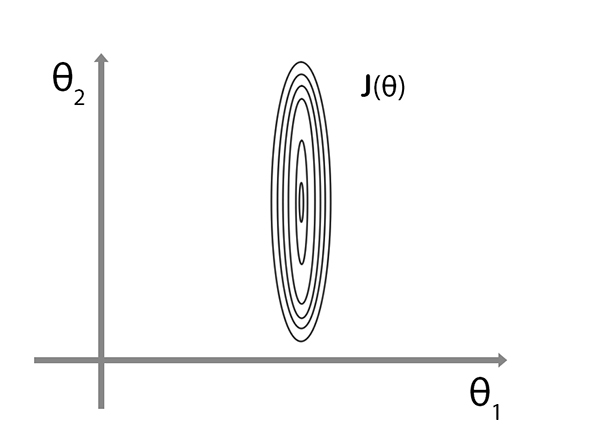

When we run gradient descent on this sort of shape cost function, algorithm can take quite a long time to converge. Oscillate meandering back and forth on a convoluted path untill finding a way to global minimum.

In this particular settings to avoid that we should scale the features:
 * x(1) = size sqr.m / 250
 * x(2) = no. rooms / 5
 
Then the contours of cost function J(θ) can become much less skew and more like circles. Gradient descent algorithm will run in much more direct path towards global minimum <code>**(mathematically provable)**</code>
 
 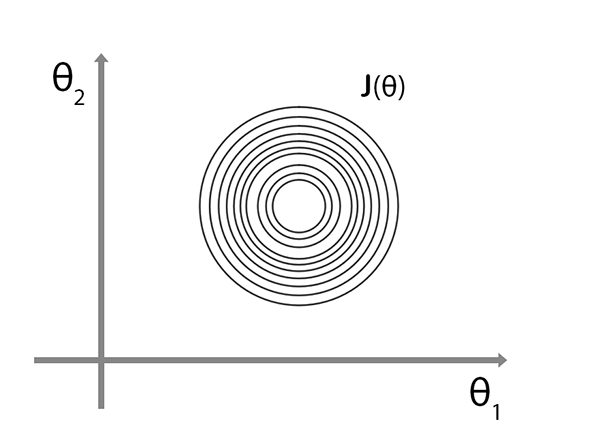

<code>**Generally try to get every feature into approximately this range for optimal performance:**</code>

$$ -1 \leq x_{i} \leq 1 $$

Its fine if you manage to get close enough, the rule of thumb is a range like <code>**-3 to 3**</code>:

$$ 0 \leq x_{1} \leq 3 $$

$$ -2 \leq x_{2} \leq 0.5 $$

$$ -\dfrac{1}{3} \leq x_{3}  \leq \dfrac{1}{3} $$

<code>**These are not okay!:**</code>

$$ -0.001 \leq x_{4} \leq 0.001 $$

$$ -100 \leq x_{5} \leq 100 $$

### Mean normalization

<code>**Replace x(i) with x(i) - u(1)**</code> to make features have approximately zero mean.<code>**(Do not apply to x(0) = 1).**</code>

E.g:
 * x(1) = size sqr.m - 100 / 190
 * x(2) = no. rooms - 2 / 6
 
 $$ -0.5 \leq x_{1} \leq 0.5,  -0.5 \leq x_{2} \leq 0.5 $$
 -----------------------------------------------------------
 $$ x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}$$
 
* u(i) is average value in the training set
* s(i) is the range (max-min) or it can be standart deviation 

<code>**Feature scalling does not have to be exact, just aim for good enough.**</code>

## Learning rate

## Outline

\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\vec{\theta})
\end{multline*}

How to debug and make sure gradient descent is working correctly ? How to choose learning rate α (alpha) correctly ?
So the job of gradient descent is to find a value of theta that minimizes cost function.
It usefull to plot J(θ) as gradient descent runs.



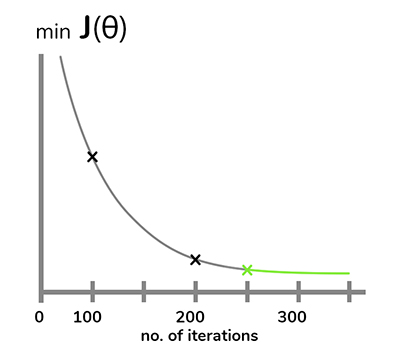

This chart shows value of J(θ) after each iteration. If GD work properly this value should decrease after each iteration.
And when GD converges its stops to deacrese rapidly. 

Sometimes for real applications GD can take a lot of iterations to converge. And that various a lot, it can 300 or 300000 no. of iterations.

It's very practical to have <code>**automatic convergance test**</code> that declares convergance if J(θ) decreases by less than some small value like <code>**10 to the power of -2**</code> in one iteration. But its hard to define this threshold correctly.

 * For sufficiently small alpha, J(θ) should decrease on every iteration;
 * But if alpha is too small, gradient descent can be slow to converge;
 * If alpha rate to large  J(θ) may not decrease on every iteration, may not even converge.
 
 ### Homework exercise
 <code>**Choose alpha candidates : 0.001-0.003, 0.01-0.03, 0.1-0.3, 1 and plot J(θ) with all learning rates.**</code>

## Features and polynomial regression

Choice of features that we have and how can we get different learning algorithms by choosing approriate features. And in particulalr about polynomial regresion which allows us to use linear regresion to fit very complicated and ussualy non-linear functions. 

Let's tak a look at our toy sample case for housing prices prediction

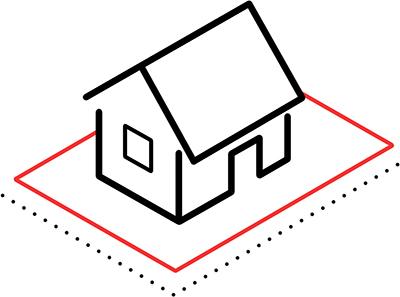

$$ h_{\theta}(x) = \theta_{0} + \theta_{1} \times \text{frontage}+ \theta_{2} \times \text{depth} $$

We have two features, the frontage and depth of the house (the length and width of slot of house land property)
With these two feature we can build linear regresion model, but we don't necessary need to use the features we are given. We can create new features by ourselves, if we decide that what really determines the size of house is <code>**area**</code>:  
$$ x = \text{frontage} \times \text{depth}$$

So we can select our hypothesis as this:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

Depending on what insight you might have into a particular problem rather than just taking the features sometimes by defining new features we can get a better model.

## Polynomial regression

Closely related to the concept of feature choice is <code>**polynomial regression**</code>.

For example if we have a housing price data that might look like this:

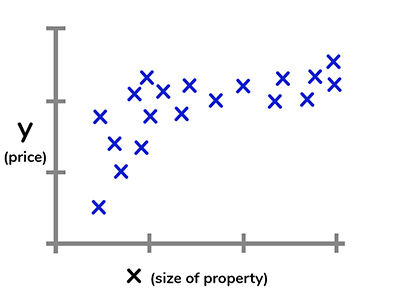

There are <code>**DIFFERENT MODEL**</code> that we might fit to this. That means that our hypothesis function doesn't need not be linear <code>**a straight line**</code> if that does not fit the data well. Thus we can change the curve of our hypothesis function by making it a <code>**quadratic, cubic or square root function**</code> or any other polynomial form.

<code>**Quadratic**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}x^2
\end{multline*}
<br>

<code>**Cubic**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}x^2 + \theta_{3}x^3
\end{multline*}

<code>**Square root**</code>
\begin{multline*}
\theta_{0} + \theta_{1}x + \theta_{2}\sqrt{x} + \theta_{3}x^3
\end{multline*}

We actually fit a model like this to our data by using machinery of multivariant linear regession we can do this with a pretty simple modification to our algorithm. 
Let's say our hypothesis function is:<br>

The form of the hypothesis looks like this:
\begin{multline*}
h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2 + \theta_{3}x^3 = \theta_{0} + \theta_{1}\text{(size)} + \theta_{2}\text{size}^2 + \theta_{3}\text{size}^3 
\end{multline*}
<br>
\begin{multline*}
x_{1} = \text{(size)} 
\end{multline*}
\begin{multline*}
x_{2} = \text{(size)}^2 
\end{multline*}
\begin{multline*}
x_{3} = \text{(size)}^3
\end{multline*}

In order to map these two definitions to each other the natural way to do that is to set the first feature x one to be size of the house, x two to be the size squared size and x three to be cubed size. And just by choosing my three features this way and applying the machinery of linear regression we can fit this model and end up with cubic fit to our data.
<code>**NOTE**</code> if we choose our features like this then feature scaling becomes increasingly important. 

<code>**size of the house ranges from 1 to 1000 sq. m**</code> 
<br>

<code>**size of sq ranges from 1 - 1 000 000**</code> 
<br>

<code>**size of cube ranges from 1 - 10 power to the 9**</code> 

Three features take on very dirrent range of values and its important to apply feature scaling if we are using gradient descent we must get them in confortable ranges of values.


Another reasonable example of another choice might be to use square root maybe there will be some value of theta parameters
that will let you take this model and fit a curve that looks like that and doesn't flatten:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}\text{(size)}+ \theta_{2}\sqrt{(size)}$$

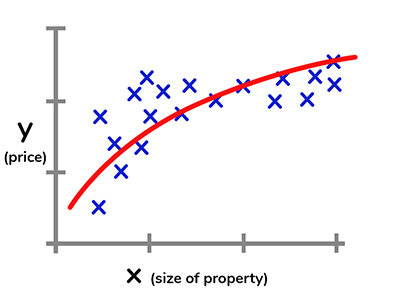

It goes up but sort of somewhere flattens a bit but never come back down. By having insights into this case the shape of a square root function and into the shape of the data, by choosing different features we can sometimes get better models. 

## Practise exercise

Suppose you want to predict a house's price as a function of its size. Your model:

$$h_{\theta}(x) = \theta_{0} + \theta_{1}\text{(size)}+ \theta_{2}\sqrt{(size)}$$

Suppose size ranges from 1 to 1000 sqr. m. You will implement this by fitting a model:
$$h_{\theta}(x) = \theta_{0} + \theta_{1}x_1 + \theta_{2}x_2$$

We will use feature scaling (without mean normalization).
Which of the following choices for <code>**x_1**</code> and <code>**x_2**</code> should we use? <code>**NOTE: \sqrt{1000} ≈32**</code>

 * $$ x_1 = \text{size}, x_2 = 32\sqrt{(size)}$$
 
 
 * $$ x_1 = 32\text{size}, x_2 = \sqrt{(size)}$$
 
 
 * $$ x_1 = \dfrac{\text{size}}{1000}, x_2 = \dfrac{\sqrt{(size)}}{32}$$
 
 
 * $$ x_1 = \dfrac{\text{size}}{32}, x_2 = \sqrt{(size)}$$
 

So we have some sense how to fit a polynomial like a quadratic or cubic function to our data. And we know that we have a choice what features to use or make up them instead of using only those that are provided. It might seem a bit bewildering that with all these different feature choices , how should we deicde what features to use. So a small sneak peak that later we will get familiar with algorithms which automatically chooses what features are used. Basically this algorithm('s) will look into the data and automatically choose for you whether you want to fit a quadratic or cubic etc. function. But untill then just for now be aware that you have a choice in what features to use and by designing different features you can fit more complex fuctions instead just fitting a straight line to the data in particular we can fit polynomial functions as well.